In [ ]:
#3) Use one or more computational notebooks and/or scripts to prepare data for analysis/sharing,including exploratory visualizations of data

In [2]:
#load required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sns


In [3]:
# Import Train Data
train = pd.read_csv('data/train.csv')

train.info()
train.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Identifying Numerical and Categorical Variables
numCols = train.select_dtypes("number").columns
catCols = train.select_dtypes("object").columns
numCols= list(set(numCols))
catCols= list(set(catCols))
print(numCols)
print(catCols)

['BsmtHalfBath', 'BsmtFinSF1', 'GarageCars', 'YrSold', 'Fireplaces', 'GarageYrBlt', 'MoSold', 'LotArea', 'OpenPorchSF', 'BsmtFullBath', 'FullBath', 'SalePrice', 'ScreenPorch', 'TotalBsmtSF', 'GrLivArea', 'EnclosedPorch', 'MiscVal', 'MasVnrArea', 'HalfBath', 'YearBuilt', 'PoolArea', 'KitchenAbvGr', 'OverallQual', '3SsnPorch', '2ndFlrSF', 'BsmtUnfSF', 'LotFrontage', 'OverallCond', 'BedroomAbvGr', 'YearRemodAdd', 'TotRmsAbvGrd', 'BsmtFinSF2', 'MSSubClass', '1stFlrSF', 'Id', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF']
['Condition1', 'LotShape', 'LandContour', 'MiscFeature', 'BsmtCond', 'FireplaceQu', 'BldgType', 'BsmtExposure', 'PavedDrive', 'BsmtFinType2', 'GarageFinish', 'GarageType', 'RoofMatl', 'BsmtQual', 'ExterQual', 'CentralAir', 'GarageQual', 'Exterior1st', 'GarageCond', 'HouseStyle', 'RoofStyle', 'MSZoning', 'Alley', 'Fence', 'HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 'Condition2', 'LotConfig', 'Heating', 'SaleType', 'SaleCondition', 'Street', 'Utilities', 'ExterCond', 

In [5]:
#Finding Missing features
missing_features = [col for col in train.columns if train[col].isnull().any()]
len(missing_features)
# Number of missing values in each column of the data
#missing_val_count_by_column = (train.isnull().sum())
#print(missing_val_count_by_column[missing_val_count_by_column > 0])

19

In [6]:
# percentage of missing values in each column
train.isnull().sum().sum() /np.product(train.shape) * 100
train[missing_features].isnull().sum().sort_values(ascending = False)/ len(train) * 100


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [7]:
#Handling Missing Variables
# For columns with most NA values, we drop them.
train = train.drop(columns=['Alley','GarageYrBlt','PoolQC','Fence','MiscFeature','Exterior2nd','GarageType','GarageFinish','GarageQual','GarageCond'])
print(train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0            Lvl    AllPub    Inside  ... 

In [8]:
# Mean Imput strategy

mean_imputer = SimpleImputer()

# Mode Imput strategy

mode_imputer = SimpleImputer(strategy='most_frequent')

In [9]:
# Creating the list of columns where each imputing strategy will be used.
#Handling Missing Variables
#For Categorical data: we will replace the NA values with the mode
#For Numerical data : we will replace the NA values with the mean

mean_columns = ['LotFrontage','MasVnrArea']
mode_columns = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical']


# Impute Mean

mean = mean_imputer.fit_transform(train[mean_columns])
train[mean_columns] = pd.DataFrame(mean).values

# Impute Mode

train = pd.DataFrame(mode_imputer.fit_transform(train,mode_columns),columns=train.columns)


In [10]:
#check if we got rid of NA values
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 71, dtype: int64

In [11]:
#convert all date columns from float values as categories.
train.YearBuilt = train.YearBuilt.astype(str)
train.YrSold = train.YrSold.astype(str)
train.YearRemodAdd = train.YearRemodAdd.astype(str)
train.MoSold = train.MoSold.astype(str)


In [12]:
train.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460,1460,1460,1460.000000,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,1460,15,5,111.000000,1073,2,4,4,2,5,...,120,20,76,8,21,12,5,9,6,663
top,1,20,RL,70.049958,7200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2009,WD,Normal,140000
freq,1,536,1151,259.000000,25,1454,925,1311,1459,1052,...,1252,1436,1344,1453,1408,253,338,1267,1198,20


/Users/harikrishnansanthosh/opt/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


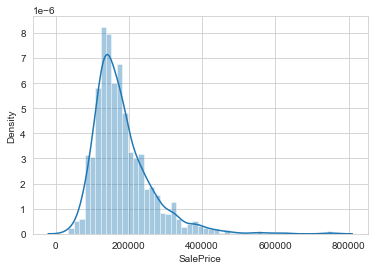

In [13]:
#Check distribution of the saleprice
y = train.SalePrice

sns.set_style('whitegrid')
sns.distplot(y)
plt.show()


<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

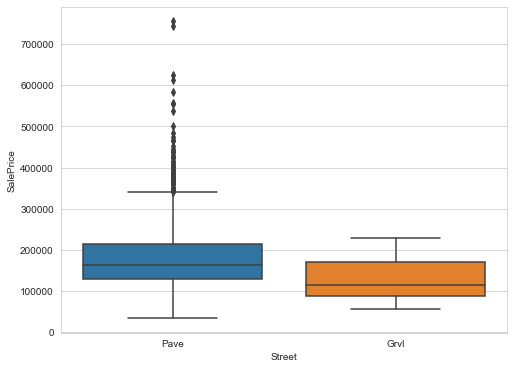

In [14]:
# Visualizing some of the categorical variables' realtionship with Sale Price
plt.figure(figsize = (8,6))
sns.boxplot(x = train.Street,y = y,data = train)

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

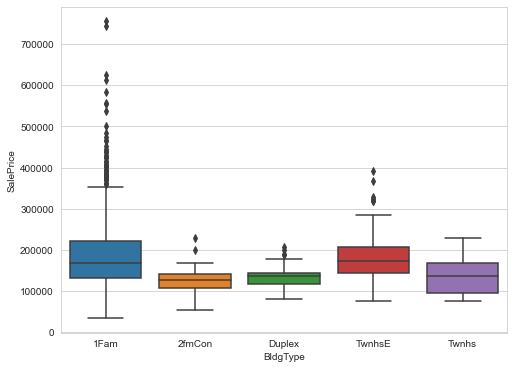

In [15]:
# Visualizing some of the categorical variables' realtionship with Sale Price
plt.figure(figsize = (8,6))
sns.boxplot(x = train.BldgType,y = y,data = train)

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

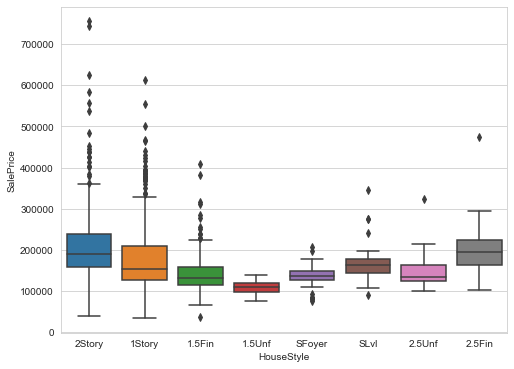

In [16]:
plt.figure(figsize = (8,6))
sns.boxplot(x = train.HouseStyle,y = y,data = train)

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

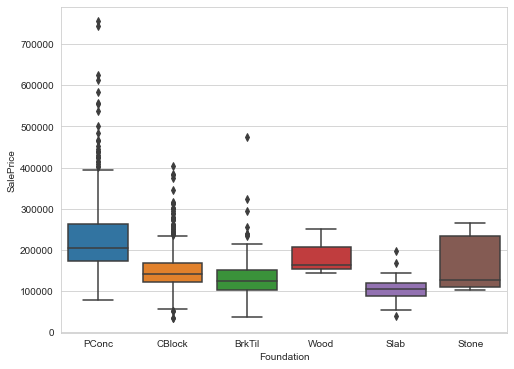

In [17]:
plt.figure(figsize = (8,6))
sns.boxplot(x = train.Foundation,y = y,data = train)

<AxesSubplot:xlabel='CentralAir', ylabel='SalePrice'>

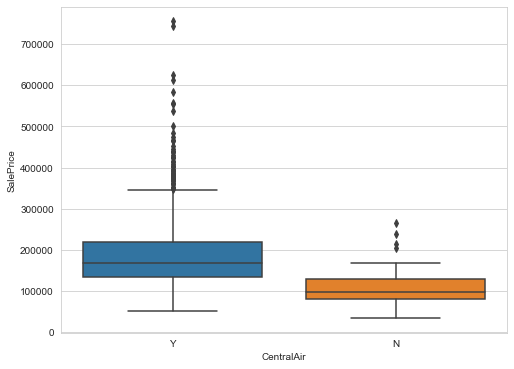

In [18]:
plt.figure(figsize = (8,6))
sns.boxplot(x = train.CentralAir,y = y,data = train)

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

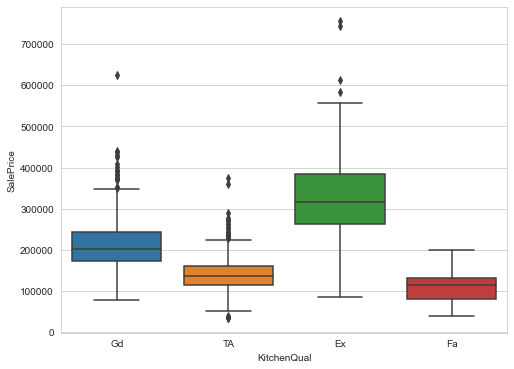

In [19]:
plt.figure(figsize = (8,6))
sns.boxplot(x = train.KitchenQual,y = y,data = train)

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

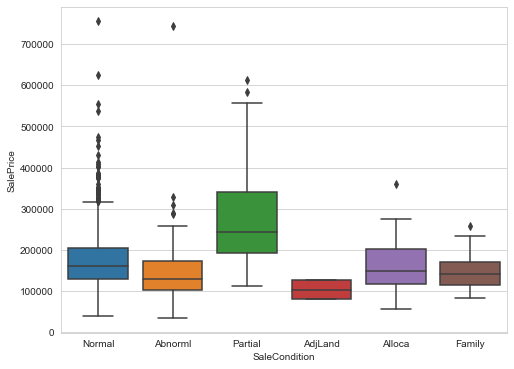

In [20]:
plt.figure(figsize = (8,6))
sns.boxplot(x = train.SaleCondition,y = y,data = train)

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

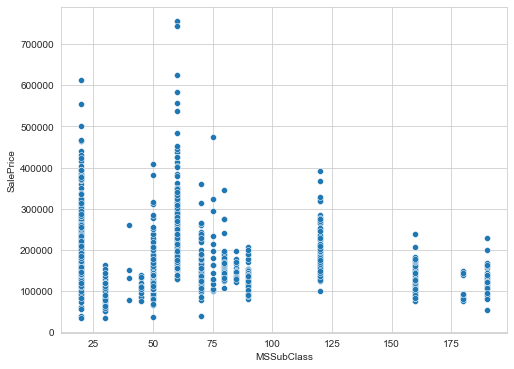

In [21]:
## Visualizing some of the numerical variables' realtionship with Sale Price
plt.figure(figsize = (8,6))
sns.scatterplot(x = train.MSSubClass,y = y,data = train)

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

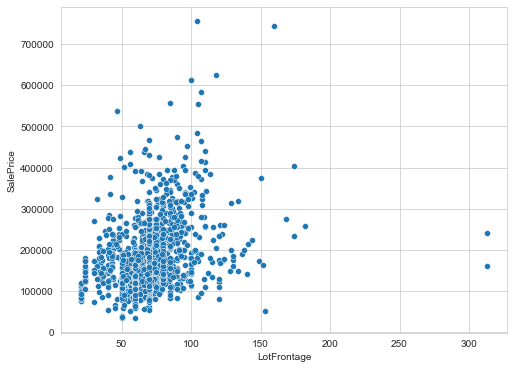

In [22]:
## Visualizing some of the numerical variables' realtionship with Sale Price
plt.figure(figsize = (8,6))
sns.scatterplot(x = train.LotFrontage,y = y,data = train)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

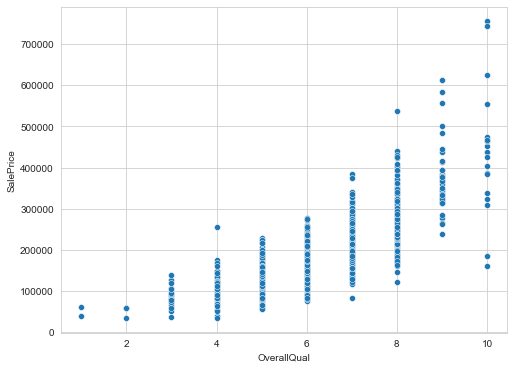

In [23]:
## Visualizing some of the numerical variables' realtionship with Sale Price
plt.figure(figsize = (8,6))
sns.scatterplot(x = train.OverallQual,y = y,data = train)

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

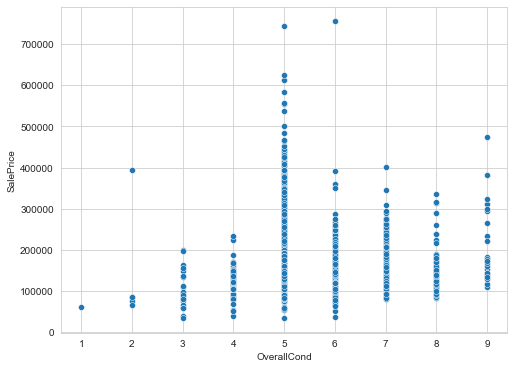

In [24]:
## Visualizing some of the numerical variables' realtionship with Sale Price
plt.figure(figsize = (8,6))
sns.scatterplot(x = train.OverallCond,y = y,data = train)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

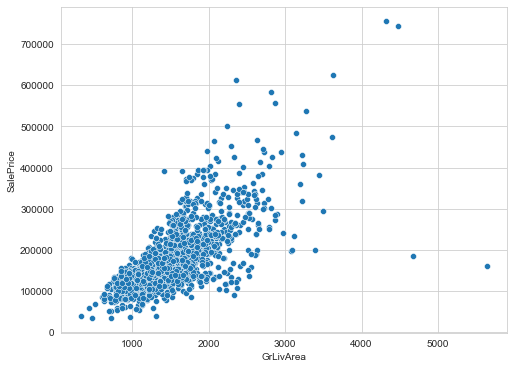

In [25]:
## Visualizing some of the numerical variables' realtionship with Sale Price
plt.figure(figsize = (8,6))
sns.scatterplot(x = train.GrLivArea,y = y,data = train)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

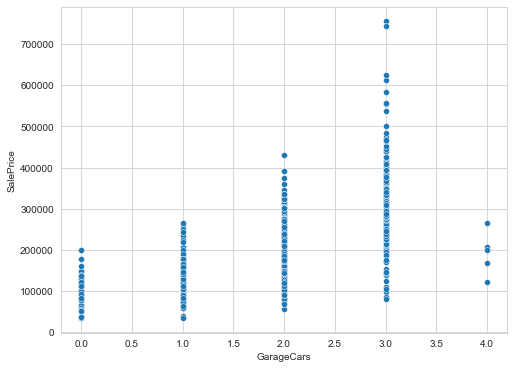

In [27]:
## Visualizing some of the numerical variables' realtionship with Sale Price
plt.figure(figsize = (8,6))
sns.scatterplot(x = train.GarageCars,y = y,data = train)

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

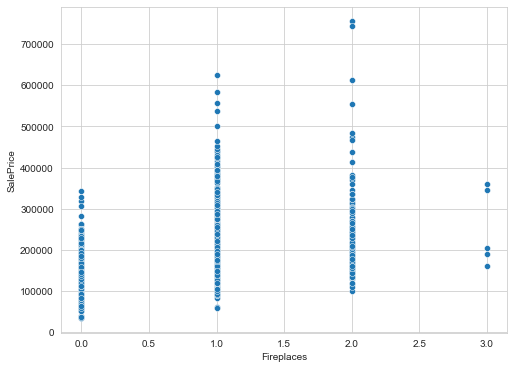

In [28]:
## Visualizing some of the numerical variables' realtionship with Sale Price
plt.figure(figsize = (8,6))
sns.scatterplot(x = train.Fireplaces,y = y,data = train)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

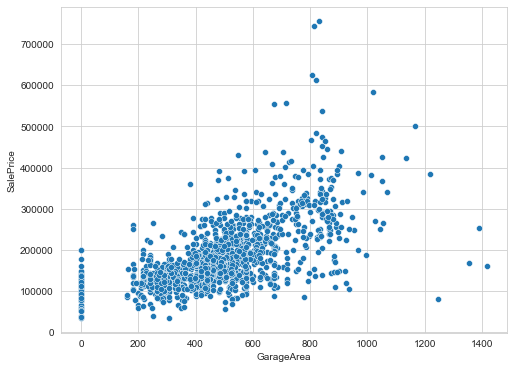

In [29]:
## Visualizing some of the numerical variables' realtionship with Sale Price
plt.figure(figsize = (8,6))
sns.scatterplot(x = train.GarageArea,y = y,data = train)

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

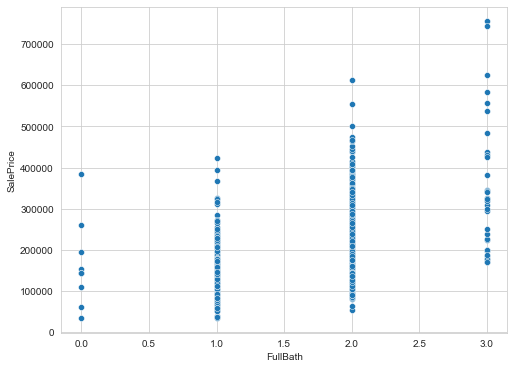

In [30]:
## Visualizing some of the numerical variables' realtionship with Sale Price
plt.figure(figsize = (8,6))
sns.scatterplot(x = train.FullBath,y = y,data = train)